In [144]:
#create blank spacy model
nlp = spacy.blank("en")

In [145]:
import spacy
nlp = spacy.load("en_core_web_sm")

**Load Training Data**

In [173]:
import pandas as pd
df = pd.read_excel('annotated_data.xls')
df

,Evidence,Law,Case Name
0,trial to the reading evidence transcript record,first transcript evidence authenticated accord...,CHARLES BURDETTE v. CITY OF BOSTON
1,1831 entitled act,phillips county act,MERRIMACK VALLEY NATIONAL BANK v. G. STEWART B...
2,hearing evidence,daniel j 1 act congress 1793 sec 51,DAVID M. SCHNEIDERMAN v. COMMONWEALTH OF MASSA...
3,hand seal sign witness,ground death plantiff law,"ALVAN E. LEVENSON, TRUSTEE v. JOHN C. BERTOLET"
4,recover evidence count gold sold,bond prosecute act 1818,COMMERCIAL PLASTICS AND SUPPLY CORP. v. ACE DA...
...,...,...,...
95,NaN,NaN,John Brown vs. Snow Diligence
96,NaN,NaN,Joseph Allen vs. Schooner St. Joseph de las An...
97,NaN,NaN,The Libel Wm Averill vs Sloop Merrimack
98,NaN,NaN,"Thomas Henderson and Benjamin Almy, et al. vs...."


**Insert training data into a dataframe**

In [38]:
TRAIN_DATA = []
for i in df['Court names']:
  TRAIN_DATA.append((i, {'entities':[(0,len(i)-1,'COURT_NAME')]}))

In [147]:
TRAIN_DATA = []
for i in df['Evidence'].dropna().unique():
    TRAIN_DATA.append((i, {'entities':[(0,len(i)-1,'EVIDENCE')]}))

In [148]:
for i in df['Law'].dropna().unique():
    TRAIN_DATA.append((i, {'entities':[(0,len(i)-1,'LAW')]}))

In [149]:
for i in df['Case Name'].dropna().unique():
    TRAIN_DATA.append((i, {'entities':[(0,len(i)-1,'CASE_NAME')]}))

In [150]:
TRAIN_DATA

[('trial to the reading evidence transcript record ',
  {'entities': [(0, 47, 'EVIDENCE')]}),
 ('1831 entitled act ', {'entities': [(0, 17, 'EVIDENCE')]}),
 ('hearing evidence', {'entities': [(0, 15, 'EVIDENCE')]}),
 ('hand seal sign witness', {'entities': [(0, 21, 'EVIDENCE')]}),
 ('recover evidence count gold sold', {'entities': [(0, 31, 'EVIDENCE')]}),
 ('jury evidence ', {'entities': [(0, 13, 'EVIDENCE')]}),
 ('writ error evidene', {'entities': [(0, 17, 'EVIDENCE')]}),
 ('first transcript evidence authenticated accordance law',
  {'entities': [(0, 53, 'LAW')]}),
 ('phillips county act', {'entities': [(0, 18, 'LAW')]}),
 ('daniel j 1 act congress 1793 sec 51 ', {'entities': [(0, 35, 'LAW')]}),
 ('ground death plantiff law', {'entities': [(0, 24, 'LAW')]}),
 ('bond prosecute act 1818', {'entities': [(0, 22, 'LAW')]}),
 ('certiorari justice peace virtue existing law',
  {'entities': [(0, 43, 'LAW')]}),
 ('act 1818', {'entities': [(0, 7, 'LAW')]}),
 ('dgenral demurrer blakeley bill ', 

# Getting the pipeline component

In [151]:
ner=nlp.get_pipe("ner")

In [152]:
for _, annotations in TRAIN_DATA:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])
#         print(ent)
nlp.entity.labels

('CARDINAL',
 'CASE_NAME',
 'DATE',
 'EVENT',
 'EVIDENCE',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART')

In [153]:
# Disable pipeline components you dont need to change
pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
unaffected_pipes

['tagger', 'parser']

In [154]:
# Import requirements
import random
from spacy.util import minibatch, compounding
from pathlib import Path

loss =[]
# TRAINING THE MODEL
with nlp.disable_pipes(*unaffected_pipes):

  # Training for 5 iterations
  for iteration in range(20):
    # shuufling examples  before every iteration
    random.shuffle(TRAIN_DATA)
    losses = {}
    # batch up the examples using spaCy's minibatch
    batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
    for batch in batches:
        texts, annotations = zip(*batch)        
        nlp.update(
                    texts,  # batch of texts
                    annotations,  # batch of annotations
                    drop=0.5,  # dropout - make it harder to memorise data
                    losses=losses,
                )
        print("Losses", losses)
        loss.append(losses['ner'])

Losses {'ner': 67.81296825408936}
Losses {'ner': 67.81296825408936}
Losses {'ner': 79.27926528453827}
Losses {'ner': 79.27926528453827}
Losses {'ner': 88.6136702559246}
Losses {'ner': 90.86437132575645}
Losses {'ner': 90.86437132575645}
Losses {'ner': 90.86437132575645}
Losses {'ner': 90.86437132575645}
Losses {'ner': 100.75083753678462}
Losses {'ner': 119.02908587068748}
Losses {'ner': 138.38637470812034}
Losses {'ner': 138.38637470812034}
Losses {'ner': 155.84849047273826}
Losses {'ner': 155.84849047273826}
Losses {'ner': 175.8344758710308}
Losses {'ner': 175.8344758710308}
Losses {'ner': 192.819314580266}
Losses {'ner': 233.60365025684666}
Losses {'ner': 256.7828127591355}
Losses {'ner': 256.7828127591355}
Losses {'ner': 270.5659549681885}
Losses {'ner': 281.8348141981704}
Losses {'ner': 281.8348141981704}
Losses {'ner': 281.8348141981704}
Losses {'ner': 290.0581492202772}
Losses {'ner': 301.17111519150865}
Losses {'ner': 301.17111519150865}
Losses {'ner': 310.5754014568819}
Losses 

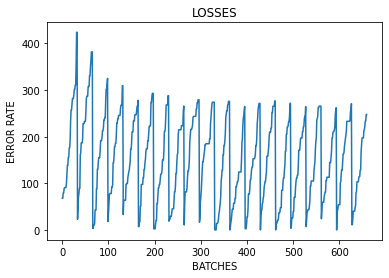

In [155]:
import matplotlib.pyplot as plt
number = [i for i in range(len(loss))]
losses = loss[0:len(loss)]  
plt.plot(number, losses)
plt.title('LOSSES')
plt.xlabel('BATCHES')
plt.ylabel('ERROR RATE')
plt.show()

# Importing test data from xlsx

In [156]:
import pandas as pd
df = pd.read_excel('test_data.xlsx')
cases = []
for i in df['Legal Data'].dropna().unique():
    text1=nlp(i)
    for word in text1.ents:
        if word.label_:
            cases.append((word.text, {'entities':[(0,len(word.text)-1,word.label_)]}))   

In [157]:
cases

[('CHARLES BURDETTE v. CITY OF BOSTON canavan j action tort brought',
  {'entities': [(0, 63, 'CASE_NAME')]}),
 ('MERRIMACK VALLEY NATIONAL BANK v. G. STEWART BAIRD, JR.',
  {'entities': [(0, 54, 'CASE_NAME')]}),
 ('1127559', {'entities': [(0, 6, 'DATE')]}),
 ('bliss 1127559', {'entities': [(0, 12, 'LAW')]}),
 ('guaranteed guaranty 13 intent defendant baird fazioli lazdowski nason respect meaning',
  {'entities': [(0, 84, 'LAW')]}),
 ('little consideration 10', {'entities': [(0, 22, 'LAW')]}),
 ('richard bliss', {'entities': [(0, 12, 'PERSON')]}),
 ('denial four 4 request allowance five 5 defendant request court made among others following finding 1 plaintiff prima facie holder due course',
  {'entities': [(0, 139, 'LAW')]}),
 ('mass 547 549 1941 liability guarantor ascertained term written contract construed according usual rule interpretation read conjunction subject matter schneider v armour 323 mass 28',
  {'entities': [(0, 179, 'LAW')]}),
 ('106', {'entities': [(0, 2, 'CARDINAL')]

In [158]:
# create dataframe for entities
import spacy
from spacy.gold import GoldParse
from spacy.scorer import Scorer

labels = []
text = []
def createDF(nlp, examples):
    for input_, annot in examples:
        i = 0
        ent = annot['entities'][i][2]
        labels.append(ent)
        text.append(input_)       
        i = i + 1

createDF(nlp, cases)

In [159]:
data = pd.DataFrame({'Text': text,
'Entities': labels})
data

,Text,Entities
0,CHARLES BURDETTE v. CITY OF BOSTON canavan j a...,CASE_NAME
1,MERRIMACK VALLEY NATIONAL BANK v. G. STEWART B...,CASE_NAME
2,1127559,DATE
3,bliss 1127559,LAW
4,guaranteed guaranty 13 intent defendant baird ...,LAW
...,...,...
7908,10th cir1988,LAW
7909,839,CARDINAL
7910,1988,DATE
7911,cert denied 488 u 1034 109 sct,LAW


# **Evaluate - Navie Bayes**

LAW          4530
CARDINAL     1665
CASE_NAME     999
DATE          385
ORDINAL        97
EVENT          59
PERSON         50
NORP           42
ORG            21
PRODUCT        18
QUANTITY       15
GPE            11
EVIDENCE        5
LANGUAGE        5
TIME            5
PERCENT         3
FAC             3
Name: Entities, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


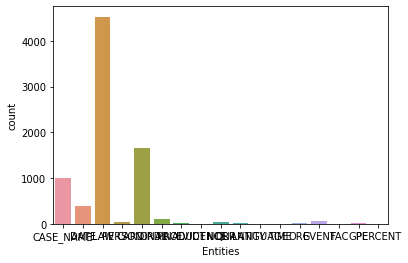

In [160]:
import seaborn as sns
print(data['Entities'].value_counts())
sns.countplot(data['Entities'])

In [161]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidfvector = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
Tfidfvector.fit(data['Text'])
x_values = Tfidfvector.transform(data['Text'])
encoder = LabelEncoder()
y_values = encoder.fit_transform(data['Entities'])

In [162]:
from sklearn import model_selection
X_train, x_test, y_train, y_test = model_selection.train_test_split(x_values, y_values, test_size=0.33)

In [163]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
nb = naive_bayes.MultinomialNB()
nb.fit(X_train, y_train)
predicted_nb = nb.predict(x_test)

In [164]:
accuracy = accuracy_score(y_test, predicted_nb) * 100
f1 = f1_score(y_test, predicted_nb, average='macro') *100
precision = precision_score(y_test, predicted_nb, average='macro') *100
recall = recall_score (y_test, predicted_nb, average='macro') *100
print('F1-score:', f1)
print('accuracy score:', accuracy)
print('precision score:', precision)
print('recall score:', recall)

F1-score: 14.302918718530988
accuracy score: 71.40122511485451
precision score: 20.05713476959394
recall score: 13.64361031317852


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Evaluate - Random Forest**

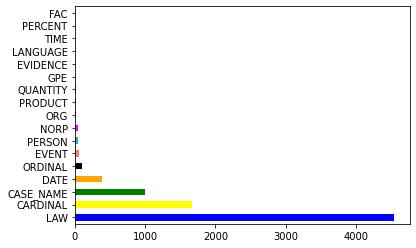

In [168]:
colors=['blue', 'yellow', 'green', 'orange', 'black', 'salmon', 'lightseagreen', 'magenta', 'maroon','red','brown','purple','aqua','mistyrose','pink','silver','snow']
data['Entities'].value_counts().plot(kind='barh',color = colors)

In [169]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidfvector = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
Tfidfvector.fit(data['Text'])
x_values = Tfidfvector.transform(data['Text'])
encoder = LabelEncoder()
y_values = encoder.fit_transform(data['Entities'])

In [170]:
from sklearn import model_selection
X_train, x_test, y_train, y_test = model_selection.train_test_split(x_values, y_values, test_size=0.33)

In [171]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred=clf.predict(x_test)

In [172]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average='macro') *100
precision = precision_score(y_test, y_pred, average='macro') *100
recall = recall_score (y_test, y_pred, average='macro') *100
print('F1-score:', f1)
print('accuracy score:', accuracy)
print('precision score:', precision)
print('recall score:', recall)

F1-score: 43.255284917380706
accuracy score: 85.56661562021439
precision score: 50.46007142353047
recall score: 39.73352617133202


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
